In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("sales_Revenue.csv")
df

,Advertising_Budget,Sales_Revenue
0,0.000000,40.630146
1,0.400802,63.376922
2,0.801603,51.703441
3,1.202405,44.493259
4,1.603206,69.764205
...,...,...
495,198.396794,-322.261881
496,198.797595,-361.553958
497,199.198397,-395.647217
498,199.599198,-365.121615


In [8]:
x=df[["Advertising_Budget"]]
x
y=df["Sales_Revenue"]



,Advertising_Budget
0,0.000000
1,0.400802
2,0.801603
3,1.202405
4,1.603206
...,...
495,198.396794
496,198.797595
497,199.198397
498,199.599198


In [9]:
poly=PolynomialFeatures(degree=2)
poly_feature=poly.fit_transform(x)
poly_feature


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00801603e-01, 1.60641925e-01],
       [1.00000000e+00, 8.01603206e-01, 6.42567701e-01],
       ...,
       [1.00000000e+00, 1.99198397e+02, 3.96800013e+04],
       [1.00000000e+00, 1.99599198e+02, 3.98398400e+04],
       [1.00000000e+00, 2.00000000e+02, 4.00000000e+04]], shape=(500, 3))

In [10]:
x_train,x_test,y_train,y_test=train_test_split(poly_feature,y,test_size=0.2,random_state=42)


In [11]:
model=LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
y_pred=model.predict(x_test)
y_pred

array([ 159.59966083,  240.73689562,  124.4095392 ,  353.73691137,
        296.19478774,   64.95316327,  115.9019981 ,  323.75576719,
        230.34178505, -135.81597308,   77.25563465,  369.45907129,
         26.1853873 ,  262.18807826,  132.77205138,   83.4668777 ,
       -333.76811851,  138.17354117,  260.38242609,   19.49849076,
       -310.16200318, -314.85099759,  317.51395234,  172.40917836,
        246.78059006, -181.19089651, -343.32336492,  368.64190176,
        291.5046966 ,  223.98510097, -241.76080594,  219.61866724,
        -96.25804682,  364.03890031,   55.37046195,  226.14414635,
         16.13087099,  234.54817226,  368.97975423,  219.54381636,
         95.48706749,  278.28875661, -286.95874597,  368.00631443,
        146.29598355,  248.76292622,   48.97252654,   83.36351221,
         -4.4132484 ,  115.80466454,  238.69010216,  367.23200429,
        331.87930628,   12.74713691,  369.36211117,  201.42912155,
        348.32057889,  104.23348243,  369.54238471,  250.72914

In [13]:
mse=mean_squared_error(y_pred,y_test)
mse
rmse=np.sqrt(mse)
rmse
score=r2_score(y_pred,y_test)
score

0.9742849123397025

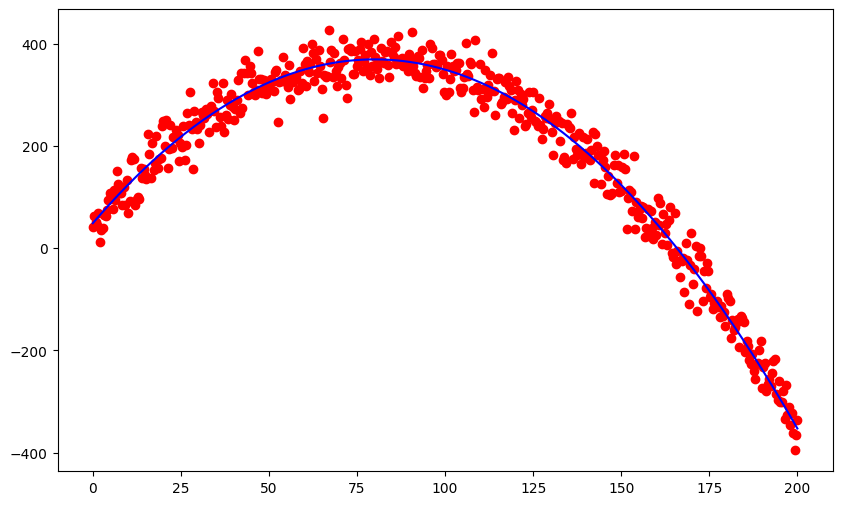

In [14]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.plot(x,model.predict(poly.transform(x)),color="blue")
plt.plot()
plt.show()

In [16]:
newdata=np.array([[1.202405]])
task=poly.fit_transform(newdata)
pre=model.predict(task)
pre

array([58.54525967])

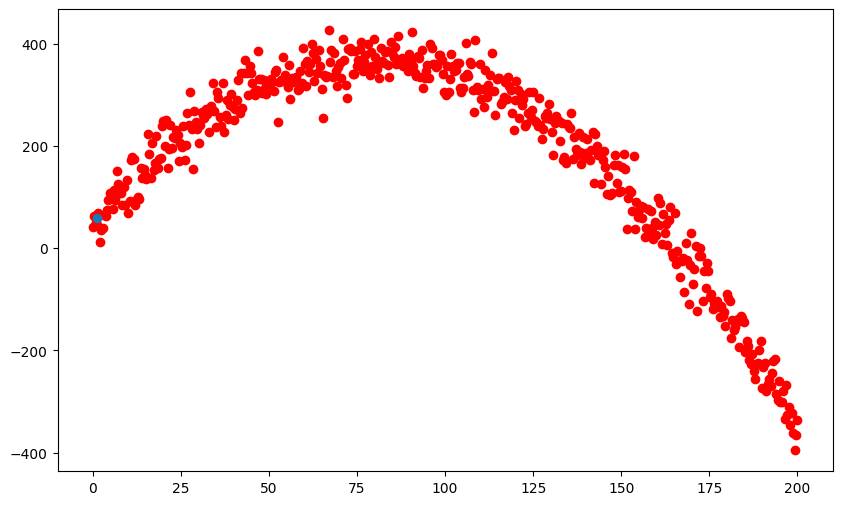

In [17]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.scatter(newdata,pre)
plt.show()
